<a href="https://colab.research.google.com/github/srumangala/Deep_learning/blob/main/Age_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression DL Problem (Determining Age from Images)

##Pre Processing

### Adding Data

Data is downloaded to new directory data . The dataset used is UTKFaces. It is contained in an archive, and needs to be extracted before using

In [1]:
!mkdir data
!gdown https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk
!mv UTKFace.tar.gz data

Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk
To: /content/UTKFace.tar.gz
100% 107M/107M [00:03<00:00, 27.1MB/s]


### Importing Libraries

In [2]:
import tarfile
import os
import glob
import tensorflow as tf
import tensorflow.keras as k
import matplotlib.pyplot as plt
import numpy as np

Creating a function which extracts the data from the folder and creates a list of all the extracted file paths using glob

In [3]:
def load_file_names():
    # Check if data has been extracted and if not extract it
    if (os.path.isdir("./data/UTKFace")):
        print("Data set already extracted...")
    else:
        print("Extracting data set...")
        tar = tarfile.open("./data/UTKFace.tar.gz")
        tar.extractall("./data")
        tar.close()

    # Get a list of all files in data set
    files = glob.glob("./data/UTKFace/*.jpg")
    labels = [int(f_name.split("/")[-1].split("_")[0]) for f_name in files]
    return files, labels

Using Matplotlib to show an image of the person with age

Extracting data set...


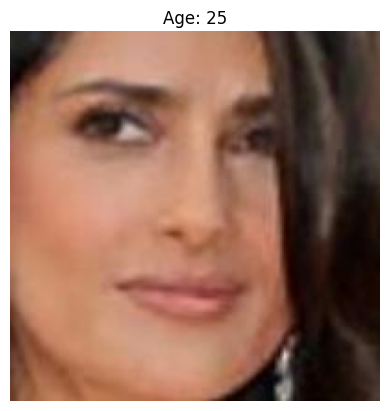

In [4]:
files, labels = load_file_names()
img = plt.imread(files[20])
plt.imshow(img)
plt.title("Age: {}".format(labels[20]))
plt.axis("off")
plt.show()

Distribution of the labels

In [5]:
print(np.unique(labels))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


In [6]:
print(len(files))

23708


In [7]:
print(len(labels))

23708


###Model Architecture

A small CNN with two convolutional and three dense layers. The conv. layers should have 8 and 16 filters of size 5x5, a stride of 4 and a ReLU activation. With a flatten layer and a dropout layer with 0.2 droprate.
The dense layers have 128, 64 and 1 neurons and again a ReLU activation.


In TensorFlow and Keras, when you create a custom model class by subclassing tf.keras.Model, you need to implement the call method. The call method specifies how the input data should be processed as it passes through the layers of the model.

Here's how the call method works in this context:

When you create an instance of the MyModel class, the constructor (__init__) is called to initialize all the layers and their configurations. This is where you define the architecture of your neural network.

The call method is called when you pass input data to the model. It takes the input data as an argument (inputs) and specifies how this data should propagate through the layers.

Inside the call method, you apply each layer to the input sequentially, following the order in which they were defined in the constructor. For example, you first apply the convolutional layers (self.conv0 and self.conv1) to the input, followed by the Flatten layer, the Dropout layer, and finally the dense layers (self.dense0, self.dense1, and self.dense2).

Each layer's output becomes the input to the next layer, and this chaining continues until the data flows through all the layers.

The result of this forward pass through the layers is the model's prediction or output, which is returned by the call method.

In [8]:
class MyModel(k.Model):
    def __init__(self):
        # Create layers
        super(MyModel, self).__init__()
        self.conv0 = k.layers.Conv2D(8,(5,5),strides=(4,4),activation='relu')
        self.conv1 = k.layers.Conv2D(16,(5,5),strides=(4,4),activation='relu')
        self.flatten = k.layers.Flatten()
        self.dropout = k.layers.Dropout(0.2)
        self.dense0 = k.layers.Dense(128, activation='relu')
        self.dense1 = k.layers.Dense(64, activation='relu')
        self.dense2 = k.layers.Dense(1, activation='relu')

    def call(self, inputs, training=False):
        # Implement forward pass
        output = self.conv0(inputs)
        output = self.conv1(output)
        output = self.flatten(output)
        output = self.dropout(output, training)
        output = self.dense0(output)
        output = self.dense1(output)
        output = self.dense2(output)
        return output

###Defining the Hyperparameters

N_epochs (Number of Epochs):

Use: It defines the number of times the entire training dataset will be fed forward and backward through the neural network during training. One epoch consists of one forward pass and one backward pass of all training examples.
Reasonable Value: Typically, this value is set based on experimentation and may vary depending on the dataset and model complexity. Starting with a small value like 20 is a reasonable initial choice, and you can adjust it based on the training progress and validation performance.
learning_rate:

Use: Learning rate determines the step size at which the optimizer updates the model's weights during training. It controls how quickly or slowly the model learns.
Reasonable Value: Common values range from 0.1 to 0.0001. The choice of learning rate can significantly impact training, and you may need to experiment to find the most suitable rate for your specific problem.
batch_size:

Use: Batch size defines the number of training examples used in each forward and backward pass. Smaller batch sizes can provide noisy but frequent weight updates, while larger batch sizes provide more stable updates.
Reasonable Value: Common batch sizes are 32, 64, 128, or 256. The choice depends on the available memory, hardware, and the size of your dataset. Smaller batch sizes are often preferred for faster convergence.
N_training_examples (Number of Training Examples):

Use: This represents the total number of examples in your training dataset. It's used for various purposes, including setting the number of steps per epoch.
Set Value: You should set this value to the actual number of training examples in your dataset.
N_validation_examples (Number of Validation Examples):

Use: It represents the number of examples used for validation during training. Typically, a subset of the dataset is reserved for validation to monitor model performance and prevent overfitting.
Set Value: It's often set to a multiple of the batch size to ensure the validation dataset is a reasonable size for evaluation.
N_parallel_iterations:

Use: It determines the number of parallel iterations when processing elements of a dataset pipeline. It can impact the speed of data preprocessing.
Reasonable Value: The choice depends on the available computational resources and can be tuned to optimize data loading performance.
N_prefetch:

Use: Prefetching allows the data pipeline to load batches of data in the background while the model is training on the current batch. It helps minimize data loading bottlenecks.
Reasonable Value: Common values are often set to a small multiple of the batch size to keep the GPU busy with training.
N_shuffle_buffer:

Use: When shuffling the training data, the shuffle buffer size determines how many examples are randomly selected and used to create a new batch. It helps introduce randomness into the training process.
Reasonable Value: A value like 20000 suggests that a substantial portion of the training dataset will be shuffled to create batches, helping in effective shuffling. The exact value can vary based on the dataset size and memory constraints.

In [9]:
N_epochs = 20
learning_rate = 0.001
batch_size = 64
N_training_examples = 20000
N_validation_examples = 4*batch_size

N_parallel_iterations = 4
N_prefetch = 8
N_shuffle_buffer = 20000

###Reading Data from file

Since we only have the file name and labels of the images, we need to actually load an image into system memory if it is needed.
For this we will define a function that parses the image, normalizes it and reshapes the label.
This reshaping is a technical detail that avoids unintended behaivior during the calculation of the loss, i.e. it avoids unintended broadcasting.

`label = tf.expand_dims(tf.cast(label, tf.float32), axis=-1)`

This line processes the label by first casting it to a float32 data type using tf.cast. It then uses tf.expand_dims to add an extra dimension to the label tensor. This is often done when the label is a scalar or one-dimensional and is needed to match the shape expected by a neural network (e.g., [batch_size, 1])

In [10]:
def parse_func(filename, label):
    image_string = tf.io.read_file(filename) # Read the image
    image_decoded = tf.io.decode_image(image_string) # Decode the image
    image = image_decoded/255 #normalize the image
    label = tf.expand_dims(tf.cast(label, tf.float32), axis=-1)
    return image, label

We now build a tensorflow Dataset object that shuffles the data with a shuffle buffer of size "N_shuffle_buffer", applies the parse_func via the .map() function with "N_parallel_iterations", creates batches
of size "batch_size" and prefetches with "N_prefetch". Please fill in the missing code.

### Building Dataset

In [11]:
def build_dataset(files, labels, batch_size):
    # Create tf data set
    ds = tf.data.Dataset.from_tensor_slices((files, labels)) # Create data set of files and labels
    ds = ds.shuffle(N_shuffle_buffer) # Enable shuffling
    ds = ds.map(parse_func, N_parallel_iterations)# Apply parse_func
    ds = ds.batch(batch_size).repeat().prefetch(N_prefetch)# Batch and prefetch
    return ds

Here, a TensorFlow dataset (ds) is created using tf.data.Dataset.from_tensor_slices. This function takes two tensors (files and labels) and creates a dataset in which each element is a pair of corresponding files and labels. It effectively combines the two lists into a dataset of tuples.

```
ds = ds.shuffle(N_shuffle_buffer)))
```

This line enables shuffling of the dataset. The ds.shuffle(N_shuffle_buffer) function shuffles the elements in the dataset using a buffer of size N_shuffle_buffer. This randomizes the order in which the data is presented during training, which can help improve the learning process.

```
ds = ds.map(parse_func, N_parallel_iterations)
```

The .map function is applied to the dataset, and it applies the parse_func function to each element in the dataset. parse_func is used to preprocess and parse the data (e.g., reading and normalizing images) as it's loaded from the files. N_parallel_iterations specifies the number of parallel calls to use when applying parse_func, which can improve data loading performance.



```
ds = ds.batch(batch_size).repeat().prefetch(N_prefetch)
```

This line chains several dataset transformations together:

`.batch(batch_size)`: This function groups elements from the dataset into batches of size batch_size. Batching is useful when training deep learning models because it processes multiple data samples together, typically to update model weights.

`.repeat()`: This function repeats the dataset indefinitely. It's commonly used when training with epochs, ensuring that the dataset continues to provide data in a loop.

`.prefetch(N_prefetch)`: This function prefetches batches of data to overlap data loading and model training, improving overall training efficiency. N_prefetch specifies the number of batches to prefetch.



### Splitting Training and Test Data

In [12]:
shuffle_idx = np.arange(len(files))
np.random.shuffle(shuffle_idx)
files = [files[i] for i in shuffle_idx]
labels = [labels[i] for i in shuffle_idx]
train_ds = build_dataset(files[0:N_training_examples],
                                     labels[0:N_training_examples], batch_size)
validation_ds = build_dataset(files[N_training_examples:N_training_examples+N_validation_examples],
                                          labels[N_training_examples:N_training_examples+N_validation_examples],
                                          batch_size)
test_ds = build_dataset(files[N_training_examples+N_validation_examples:],
                                    labels[N_training_examples+N_validation_examples:], batch_size)

##Training

For this application we will use the Mean Absolute Error (MAE) as a loss function for training.



In [13]:
# Define loss function
def loss(y, y_pred):
    return tf.reduce_mean(tf.abs(y-y_pred)) # MAE between "y" and "y_pred"

# Define training step as a complete graph
@tf.function
def train_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        tape.watch(model.trainable_variables)
        y_pred = model(x) # Predict with model on "x"
        loss_val = loss(y, y_pred)# Compute the loss with "y" and "y_pred"
    grads = tape.gradient(loss_val, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss_val

###Code explanation



```
def loss(y, y_pred):
```

This line defines a custom loss function named loss.
The function takes two arguments, y (the true target values) and y_pred (the predicted values).
Inside the function, it computes the Mean Absolute Error (MAE) between y and ```y_pred``` using ```tf.reduce_mean(tf.abs(y - y_pred))```.
The MAE measures the average absolute difference between the true and predicted values, making it a common choice for regression problems.

```
@tf.function
```

This is a Python decorator that indicates that the following function (train_step) should be compiled as a TensorFlow graph for performance optimization. It's often used with functions that involve TensorFlow operations to improve execution speed.
```
def train_step(model, optimizer, x, y):
```
This line defines a function named ```train_step```, which is used for one training step in a machine learning model.
It takes four arguments:
1. model: The machine learning model being trained.
2. optimizer: The optimizer used for updating the model's weights.
3. x: The input data (features) for the training step.
4. y: The true target values for the training step.

```
with tf.GradientTape() as tape:
```
This line starts a TensorFlow GradientTape context. This context is used to record the operations that occur within it so that gradients can be computed later during backpropagation.
```
tape.watch(model.trainable_variables)
```
Inside the GradientTape context, this line explicitly tells the tape to watch the model's trainable variables. This is necessary for computing gradients with respect to these variables.
```
y_pred = model(x)
```
This line uses the provided model to make predictions (y_pred) based on the input data x.
```
loss_val = loss(y, y_pred)
```
Here, the custom loss function loss defined earlier is used to calculate the loss between the true values ```y``` and the predicted values ```y_pred```.
```
grads = tape.gradient(loss_val, model.trainable_variables)
```

This line computes the gradients of the loss (loss_val) with respect to the trainable variables of the model. These gradients will be used for updating the model's weights during optimization.
```
optimizer.apply_gradients(zip(grads, model.trainable_variables))
```
Finally, this line applies the computed gradients to the model's trainable variables using the provided optimizer. This step performs the weight updates based on the calculated gradients.
```
return loss_val
```
The function returns the calculated loss value (loss_val) for the training step. This loss value is often used to monitor the training progress and assess the model's performance.
Overall, the train_step function encapsulates the forward pass (making predictions), loss computation, gradient calculation, and weight updates necessary for training a machine learning model. This function is typically called within a training loop to iteratively update the model's parameters during training.

##Starting Training

In [14]:
mdl = MyModel()
opt = tf.optimizers.RMSprop(learning_rate)
mdl.build((batch_size, 200, 200, 3))
mdl.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  608       
                                                                 
 conv2d_1 (Conv2D)           multiple                  3216      
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  295040    
                                                                 
 dense_1 (Dense)             multiple                  8256      
                                                                 
 dense_2 (Dense)             multiple                  65 

In [15]:
# Run training
epoch = 0
train_loss = 0.0
train_iters = 0
for train_images, train_labels in train_ds:
    train_loss += train_step(mdl, opt, train_images, train_labels)
    train_iters += 1
    if train_iters == int(N_training_examples/batch_size):
        epoch += 1
        val_loss = 0.0
        val_iters = 0
        for val_images, val_labels in validation_ds:
            y_pred = mdl(val_images)
            loss_val = loss(val_labels, y_pred)
            val_loss += loss_val
            val_iters += 1
            if val_iters == int(N_validation_examples/batch_size):
                print("Epoch: {} Training loss: {:.5} Validation loss {:.5}"
                      .format(epoch, train_loss/train_iters, val_loss/val_iters))
                break
        train_loss = 0.0
        train_iters = 0
    if epoch == N_epochs:
        break

Epoch: 1 Training loss: 17.05 Validation loss 16.425
Epoch: 2 Training loss: 13.933 Validation loss 10.779
Epoch: 3 Training loss: 11.958 Validation loss 9.0723
Epoch: 4 Training loss: 10.763 Validation loss 8.6415
Epoch: 5 Training loss: 9.8843 Validation loss 8.3569
Epoch: 6 Training loss: 9.412 Validation loss 8.0182
Epoch: 7 Training loss: 8.9522 Validation loss 7.8452
Epoch: 8 Training loss: 8.5957 Validation loss 9.0305
Epoch: 9 Training loss: 8.3315 Validation loss 7.7328
Epoch: 10 Training loss: 8.046 Validation loss 7.5133
Epoch: 11 Training loss: 7.8485 Validation loss 7.6205
Epoch: 12 Training loss: 7.6161 Validation loss 7.4021
Epoch: 13 Training loss: 7.4301 Validation loss 7.3566
Epoch: 14 Training loss: 7.292 Validation loss 6.8413
Epoch: 15 Training loss: 7.0577 Validation loss 7.4627
Epoch: 16 Training loss: 6.9421 Validation loss 6.9831
Epoch: 17 Training loss: 6.7288 Validation loss 7.0258
Epoch: 18 Training loss: 6.5623 Validation loss 6.824
Epoch: 19 Training loss:

Testing

In [16]:
# Test model
Num_test_batches = int((len(files)-N_validation_examples-N_validation_examples)/batch_size)
test_loss = 0.0
test_iters = 0
for test_images, test_labels in test_ds:
    y_pred = mdl(test_images)
    test_loss += loss(test_labels, y_pred)
    test_iters += 1
    if test_iters == Num_test_batches:
        print("Test loss: {:.5}".format(test_loss/test_iters))
        break

Test loss: 7.4716


Plotting the result

In [18]:
from google.colab import files
uploaded = files.upload()
fn = list(uploaded.keys())[0]

Saving Sru image.jpeg to Sru image.jpeg


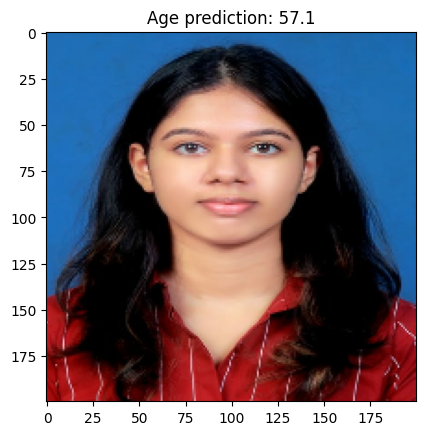

In [19]:
# Load and predict on an image
image_string = tf.io.read_file(fn)
image_decoded = tf.expand_dims(tf.io.decode_jpeg(image_string), axis=0)
image = tf.image.resize(tf.cast(image_decoded, tf.float32)/255.0, [200, 200])
age = mdl(image)

# Plot image and prediction
plt.imshow(np.squeeze(image.numpy()))
plt.title("Age prediction: {:.3}".format(np.squeeze(age.numpy())))
plt.show()